# BUSINESS MODEL FOR UBER FARE PRICING


## Load and Explore the Dataset


In [1]:
# Import required libraries/packages

import numpy as np
import pandas as pd

import warnings # To supress unnecessary warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from haversine import haversine, Unit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read the dataset
df_u= pd.read_csv(r"D:\DIGANTH RAI\upgrad\uber rides dataset\uber.csv")

In [4]:
# Look at the first few entries
df_u.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df_u.shape

(200000, 9)

In [6]:
df_u.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
# Check the info to see the types of the feature variables and the null values present
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


###  Handling Null Values

In [8]:
# Drop the rows with null values,1 row has null values
df_u.dropna(inplace=True)

In [9]:
df_u.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Convert data types: Convert the pickup_datetime and key column to datetime format for easier manipulation

In [10]:
# Convert pickup_datetime column to datetime format
df_u['pickup_datetime'] = pd.to_datetime(df_u['pickup_datetime'])

In [11]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [12]:
df_u['key'] = pd.to_datetime(df_u['key'])

## EDA

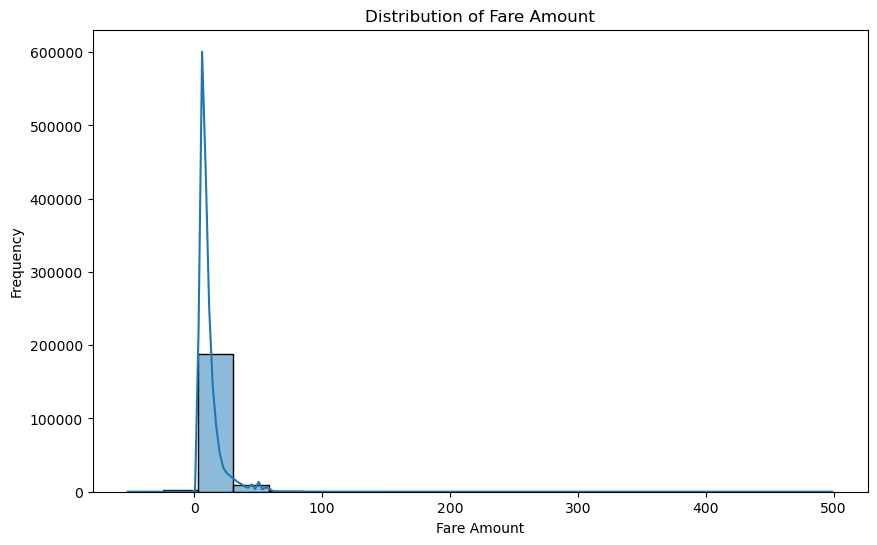

In [13]:
# Histogram for fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_u['fare_amount'], bins=20, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

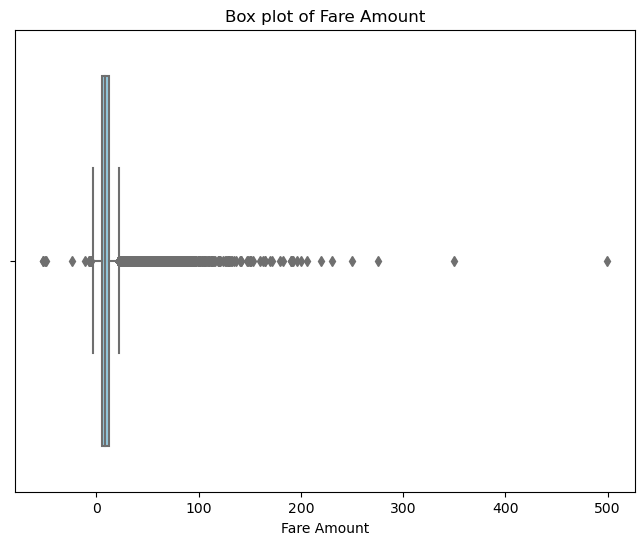

In [14]:
# Plotting a box plot to visualize outliers in fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=df_u, color='skyblue')
plt.title('Box plot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

outliers are found in fare amount.

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_u['fare_amount'].quantile(0.25)
Q3 = df_u['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out rows with fare_amount within the winsorized range and fare_amount >= 0
df = df_u[(df_u['fare_amount'] >= lower_limit) & (df_u['fare_amount'] <= upper_limit) & (df_u['fare_amount'] >= 0)]

# Reset index if needed
df.reset_index(drop=True, inplace=True)


In [16]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


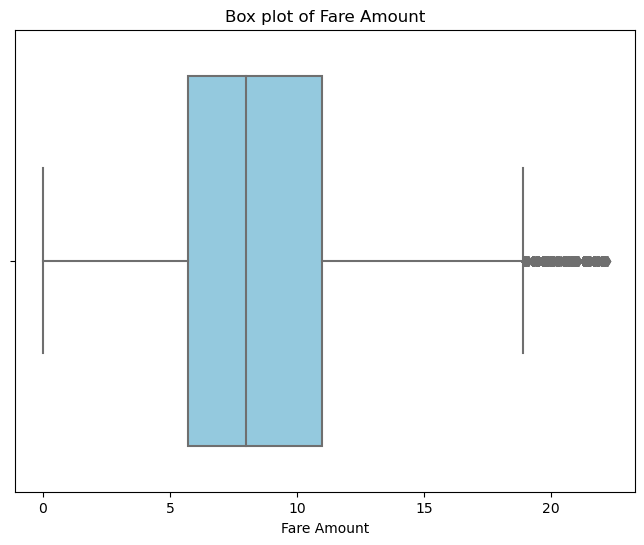

In [17]:
# Plotting a box plot to visualize outliers in fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=df, color='skyblue')
plt.title('Box plot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the outliers
df['fare_amount'] = df['fare_amount'].clip(lower=lower_limit, upper=upper_limit)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

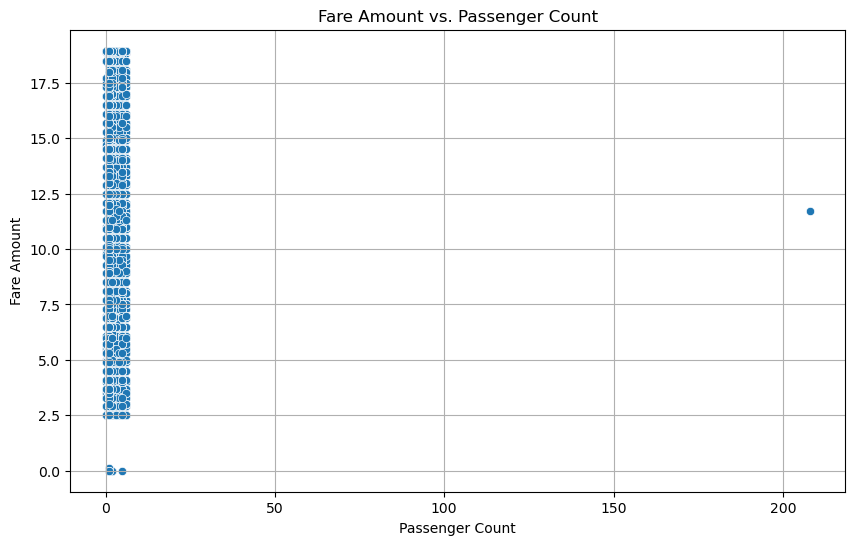

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

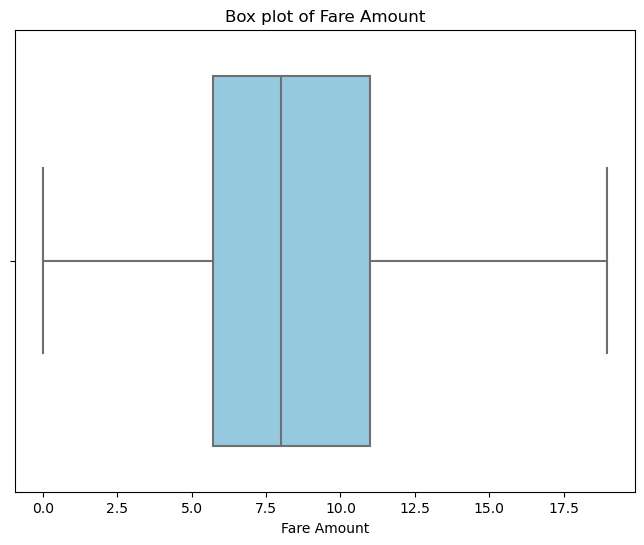

In [20]:
# Plotting a box plot to visualize outliers in fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=df, color='skyblue')
plt.title('Box plot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

In [21]:
# Drop rows where passenger count is greater than 50
df = df[df['passenger_count'] <= 50]

# Drop rows where passenger count is 0
df = df[df['passenger_count'] != 0]

# Drop rows where fare amount is less than or equal to zero
df = df[(df['fare_amount'] > 1)]

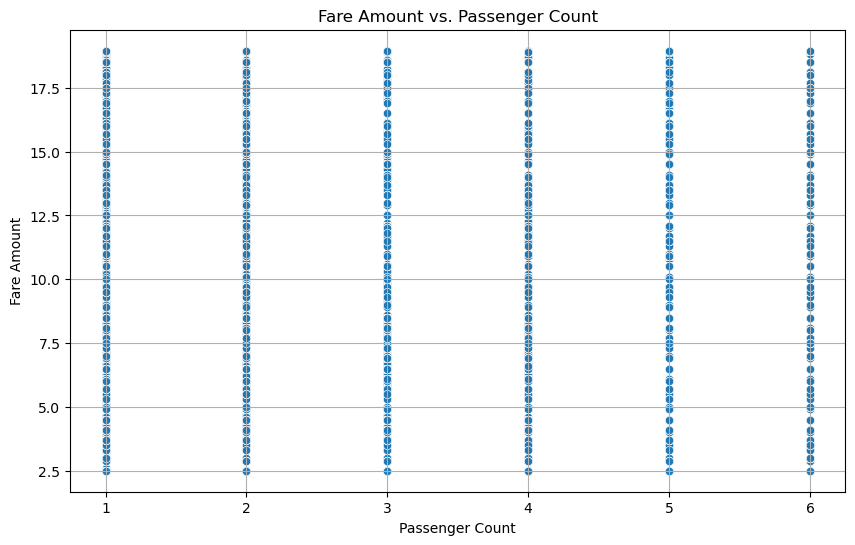

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [23]:
# Define the valid range for latitude and longitude
valid_lat_range = (-90, 90)
valid_lon_range = (-180, 180)

# Create boolean masks for rows where latitude and longitude are within the valid range
valid_lat_mask = (df['pickup_latitude'].between(*valid_lat_range)) & (df['dropoff_latitude'].between(*valid_lat_range))
valid_lon_mask = (df['pickup_longitude'].between(*valid_lon_range)) & (df['dropoff_longitude'].between(*valid_lon_range))

# Combine the masks using logical AND to get the final mask
valid_mask = valid_lat_mask & valid_lon_mask

# Filter the DataFrame to keep only rows where both latitude and longitude are within the valid range
df_filtered = df[valid_mask].copy()

In [24]:
df_filtered['distance_km'] = df_filtered.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']),
                                                   unit=Unit.KILOMETERS), axis=1)


In [25]:
df_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [26]:
df_filtered.shape

(182133, 10)

In [27]:
df_filtered.describe()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.821330e+05,182133,182133.000000,182133.000000,182133.000000,182133.000000,182133.000000,182133.000000,182133.000000
mean,2.771210e+07,2012-03-08 04:33:32.897580800,8.897501,-72.523361,39.930884,-72.533107,39.935741,1.686542,17.712034
min,1.000000e+00,2009-01-01 01:15:22.000000600,2.500000,-93.824668,-74.009697,-75.458979,-74.015750,1.000000,0.000000
25%,1.382487e+07,2010-08-07 00:07:26,5.700000,-73.992355,40.735717,-73.991661,40.735290,1.000000,1.162558
50%,2.775602e+07,2012-03-02 00:07:21.000000256,8.000000,-73.982243,40.752535,-73.980833,40.753200,1.000000,1.961128
75%,4.154584e+07,2013-10-03 14:52:21,11.000000,-73.969067,40.766497,-73.966676,40.767375,2.000000,3.282679
max,5.542357e+07,2015-06-30 23:33:33.000000200,18.950000,40.808425,48.018760,40.831932,45.031598,6.000000,8782.910738
std,1.601018e+07,NaN,4.018239,10.381277,6.058854,10.340744,6.043241,1.303872,355.183126


In [28]:
# Outliers in distance
# Calculate the interquartile range (IQR)
Q1 = df_filtered['distance_km'].quantile(0.25)
Q3 = df_filtered['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with distances outside the bounds
df_filtered = df_filtered[(df_filtered['distance_km'] >= lower_bound) & (df_filtered['distance_km'] <= upper_bound)]


Peak Traffic Hours (Based on Uber Pickups):
 Hour
0     0.037771
1     0.028070
2     0.020990
3     0.015130
4     0.009863
5     0.007844
6     0.019403
7     0.036092
8     0.046478
9     0.048082
10    0.045799
11    0.048100
12    0.050785
13    0.050728
14    0.048738
15    0.048157
16    0.041457
17    0.049273
18    0.062109
19    0.065594
20    0.059728
21    0.057445
22    0.054500
23    0.047864
dtype: float64


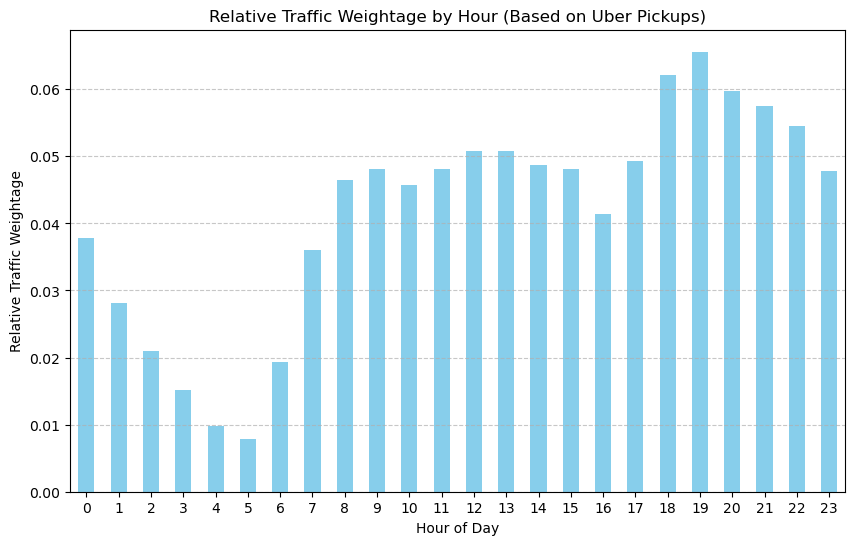

In [29]:
df_filtered['Hour'] = df_filtered['pickup_datetime'].dt.hour
hourly_pickups = df_filtered.groupby('Hour').size()
normalized_traffic_weightage = hourly_pickups / hourly_pickups.sum()
df_filtered['Traffic_Weitage'] = df_filtered['Hour'].map(normalized_traffic_weightage)
print("Peak Traffic Hours (Based on Uber Pickups):\n", normalized_traffic_weightage)

plt.figure(figsize=(10, 6))
normalized_traffic_weightage.plot(kind='bar', color='skyblue')
plt.title('Relative Traffic Weightage by Hour (Based on Uber Pickups)')
plt.xlabel('Hour of Day')
plt.ylabel('Relative Traffic Weightage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###  Heavy traffic indicates more people are travelling.

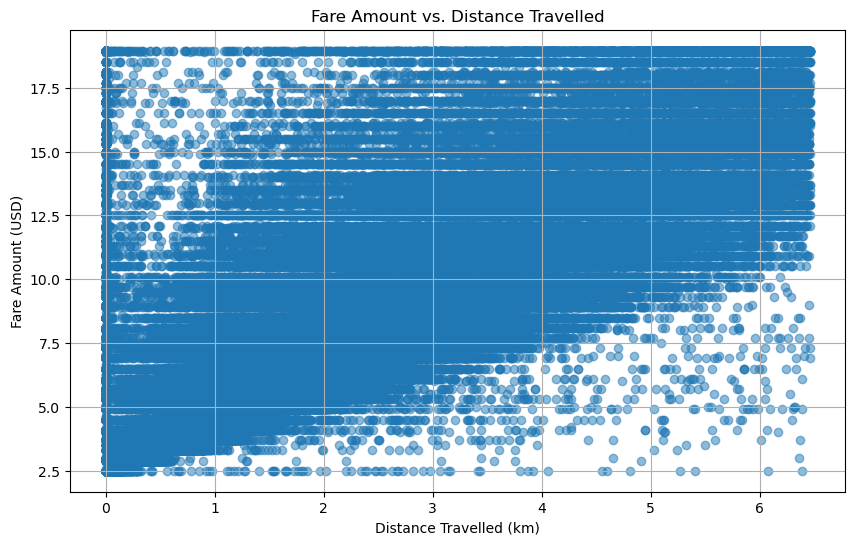

In [30]:
# Creating scatter plot for fare amount vs. distance travelled
plt.figure(figsize=(10, 6))  
plt.scatter(df_filtered['distance_km'], df_filtered['fare_amount'], alpha=0.5)  
plt.title('Fare Amount vs. Distance Travelled')  
plt.xlabel('Distance Travelled (km)')  
plt.ylabel('Fare Amount (USD)')  
plt.grid(True)  
plt.show() 

In [31]:
# Drop rows with fare amount less than 0
df_filtered = df_filtered[df_filtered['fare_amount'] >= 0]


In [32]:
df_filtered.shape

(173889, 12)

In [33]:
df_filtered.describe()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Hour,Traffic_Weitage
count,1.738890e+05,173889,173889.000000,173889.000000,173889.000000,173889.000000,173889.000000,173889.000000,173889.000000,173889.000000,173889.000000
mean,2.770690e+07,2012-03-14 01:59:31.747074560,8.532576,-72.533591,39.931853,-72.532390,39.931923,1.687393,2.218992,13.594362,0.047887
min,4.500000e+01,2009-01-01 01:15:22.000000600,2.500000,-75.387785,-74.009697,-75.375315,-74.009857,1.000000,0.000000,0.000000,0.007844
25%,1.380864e+07,2010-08-11 14:45:44.000000256,5.700000,-73.992235,40.736448,-73.991680,40.736150,1.000000,1.131392,9.000000,0.045799
50%,2.774444e+07,2012-03-10 19:09:00.000000256,7.700000,-73.982210,40.752675,-73.981113,40.753210,1.000000,1.876805,14.000000,0.048157
75%,4.154905e+07,2013-10-10 23:24:55.000000768,10.500000,-73.969298,40.766368,-73.967773,40.766800,2.000000,3.030451,19.000000,0.054500
max,5.542357e+07,2015-06-30 23:33:33.000000200,18.950000,40.808425,45.031653,40.831932,45.031598,6.000000,6.462775,23.000000,0.065594
std,1.601615e+07,NaN,3.665994,10.348345,6.059620,10.348186,6.059634,1.304855,1.454648,6.433022,0.012084


In [34]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173889 entries, 0 to 182826
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         173889 non-null  int64              
 1   key                173889 non-null  datetime64[ns]     
 2   fare_amount        173889 non-null  float64            
 3   pickup_datetime    173889 non-null  datetime64[ns, UTC]
 4   pickup_longitude   173889 non-null  float64            
 5   pickup_latitude    173889 non-null  float64            
 6   dropoff_longitude  173889 non-null  float64            
 7   dropoff_latitude   173889 non-null  float64            
 8   passenger_count    173889 non-null  int64              
 9   distance_km        173889 non-null  float64            
 10  Hour               173889 non-null  int32              
 11  Traffic_Weitage    173889 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime

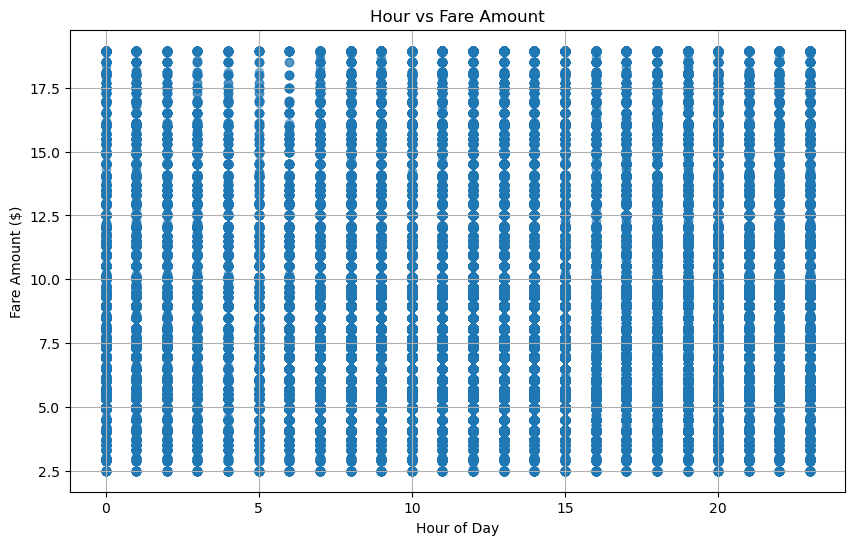

In [35]:
# Plot graph between hour and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Hour'], df_filtered['fare_amount'], alpha=0.5)
plt.title('Hour vs Fare Amount')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


In [36]:
df_filtered.drop(columns=['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df_filtered.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage
0,7.5,2015-05-07 19:52:06+00:00,1,1.683325,19,0.065594
1,7.7,2009-07-17 20:04:56+00:00,1,2.457593,20,0.059728
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057445
3,5.3,2009-06-26 08:22:21+00:00,3,1.661686,8,0.046478
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.049273


In [37]:
# Convert 'pickup_datetime' to datetime type
df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract pickup dates
df_filtered['pickup_date'] = df_filtered['pickup_datetime'].dt.date

# Obtain weekdays and convert them to day names
df_filtered['weekday'] = df_filtered['pickup_datetime'].dt.day_name()

In [38]:
df_filtered.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,pickup_date,weekday
0,7.5,2015-05-07 19:52:06+00:00,1,1.683325,19,0.065594,2015-05-07,Thursday
1,7.7,2009-07-17 20:04:56+00:00,1,2.457593,20,0.059728,2009-07-17,Friday
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057445,2009-08-24,Monday
3,5.3,2009-06-26 08:22:21+00:00,3,1.661686,8,0.046478,2009-06-26,Friday
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.049273,2014-08-28,Thursday


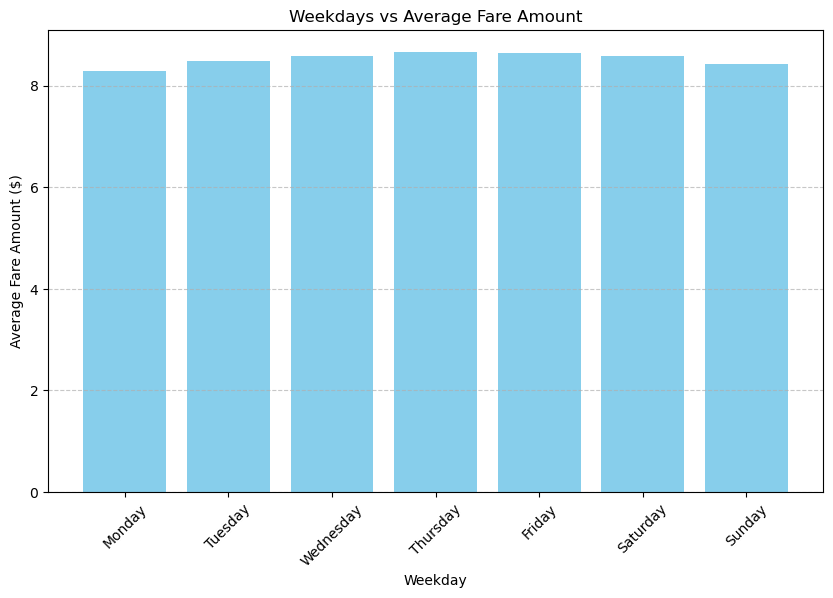

In [39]:
import matplotlib.pyplot as plt

# Grouping by weekdays and calculating mean fare
weekday_stats = df_filtered.groupby('weekday')['fare_amount'].mean().reset_index()

# Sorting by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats.sort_values('weekday', inplace=True)

# Plotting bar graph for weekdays vs fare
plt.figure(figsize=(10, 6))
plt.bar(weekday_stats['weekday'], weekday_stats['fare_amount'], color='skyblue')
plt.title('Weekdays vs Average Fare Amount')
plt.xlabel('Weekday')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Average fare  is highest during mid weeks

Drop 'pickup_date' and 'pickup_datetime' columns  as we have inplace of them

In [40]:
# Drop 'pickup_date' and 'pickup_datetime' columns
df_filtered.drop(['pickup_date', 'pickup_datetime'], axis=1, inplace=True)

# Convert 'weekday' column to category type
df_filtered['weekday'] = df_filtered['weekday'].astype('category')

In [41]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173889 entries, 0 to 182826
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   fare_amount      173889 non-null  float64 
 1   passenger_count  173889 non-null  int64   
 2   distance_km      173889 non-null  float64 
 3   Hour             173889 non-null  int32   
 4   Traffic_Weitage  173889 non-null  float64 
 5   weekday          173889 non-null  category
dtypes: category(1), float64(3), int32(1), int64(1)
memory usage: 7.5 MB


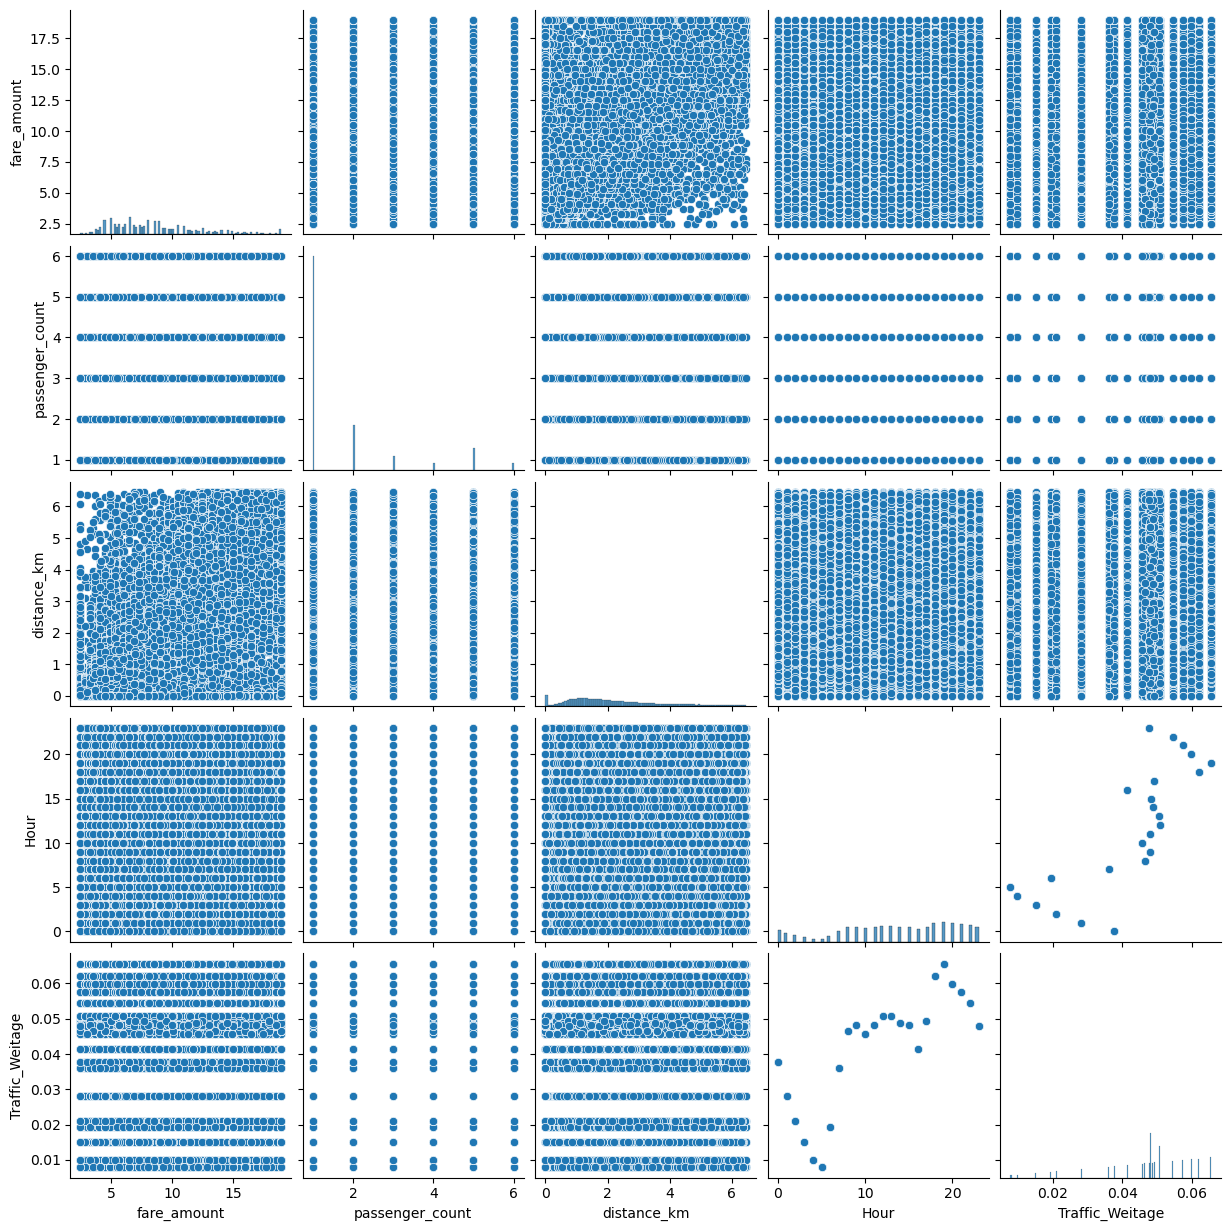

In [42]:
sns.pairplot(df_filtered)

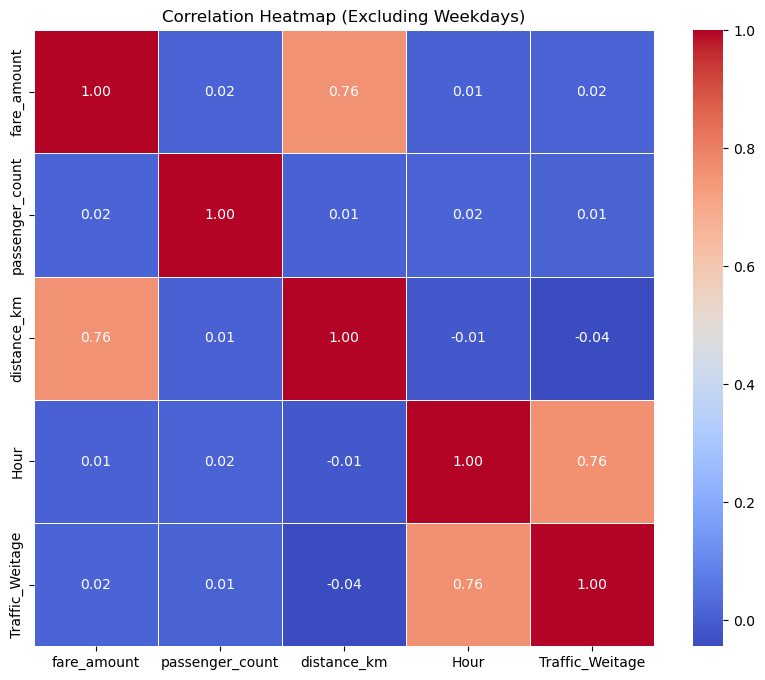

In [43]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = ['fare_amount', 'passenger_count', 'distance_km', 'Hour', 'Traffic_Weitage']

# Calculating the correlation matrix for numeric columns of the DataFrame df_filtered
correlation_matrix = df_filtered[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Weekdays)')
plt.show()


### As the distance increases fare price also  increases and they are highly correlated

## Dummy varriables
To create dummy variables for weekdays in pandas, you can use the get_dummies() function. 

In [44]:
# Create dummy variables for weekdays
weekday_dummies = pd.get_dummies(df_filtered['weekday'])

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df_filtered, weekday_dummies], axis=1)

# Drop the original 'weekday' column as it is no longer needed
df_with_dummies.drop('weekday', axis=1, inplace=True)


In [45]:
# Convert boolean columns to integers
df_with_dummies['Friday'] = df_with_dummies['Friday'].astype(int)
df_with_dummies['Monday'] = df_with_dummies['Monday'].astype(int)
df_with_dummies['Saturday'] = df_with_dummies['Saturday'].astype(int)
df_with_dummies['Sunday'] = df_with_dummies['Sunday'].astype(int)
df_with_dummies['Thursday'] = df_with_dummies['Thursday'].astype(int)
df_with_dummies['Tuesday'] = df_with_dummies['Tuesday'].astype(int)
df_with_dummies['Wednesday'] = df_with_dummies['Wednesday'].astype(int)


#  Splitting the Data into Training and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(0)

# Perform train-test split
df_train, df_test = train_test_split(df_with_dummies, train_size=0.7, test_size=0.3, random_state=100)

# Check the shapes of the resulting dataframes
print("Shape of training data:", df_train.shape)
print("Shape of testing data:", df_test.shape)


Shape of training data: (121722, 12)
Shape of testing data: (52167, 12)


###  Scaling of data

In [47]:
from sklearn.preprocessing import MinMaxScaler
# Columns to be scaled
cols_to_scale = ['passenger_count', 'distance_km', 'Hour', 'Traffic_Weitage']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

# Transform the test data using the scaler fitted on the training data
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

# Display the scaled data
print(df_train.head())


        fare_amount  passenger_count  distance_km      Hour  Traffic_Weitage  \
171607         13.5              0.0     0.789352  0.130435         0.126170   
117149         10.5              0.0     0.491332  1.000000         0.692989   
42403          12.9              0.0     0.877737  0.086957         0.227644   
83609           7.9              0.0     0.215435  0.826087         1.000000   
28242           9.5              0.0     0.445277  0.043478         0.350229   

        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
171607       1       0         0       0         0        0          0  
117149       0       1         0       0         0        0          0  
42403        0       0         0       1         0        0          0  
83609        0       0         0       0         0        1          0  
28242        0       1         0       0         0        0          0  


In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Print correlation coefficients with respect to the target variable (fare_amount)
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


fare_amount        1.000000
distance_km        0.756970
passenger_count    0.018493
Traffic_Weitage    0.016294
Thursday           0.015012
Friday             0.013471
Wednesday          0.006575
Hour               0.006483
Saturday           0.005094
Tuesday           -0.007072
Sunday            -0.009996
Monday            -0.025944
Name: fare_amount, dtype: float64


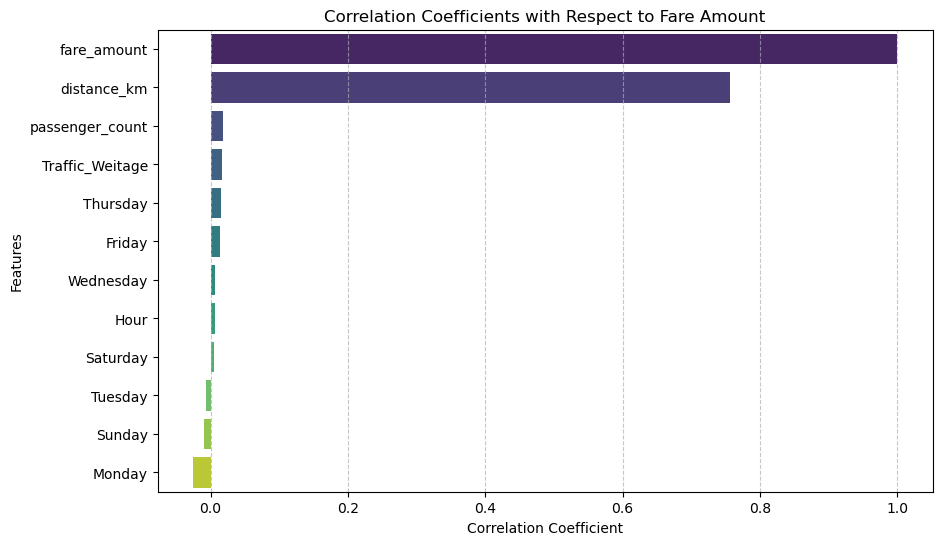

In [49]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Sort correlation coefficients with respect to the target variable (fare_amount)
sorted_correlation = correlation_matrix['fare_amount'].sort_values(ascending=False)

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, palette='viridis')
plt.title('Correlation Coefficients with Respect to Fare Amount')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Dividing into X and Y sets for the model building

In [49]:
y_train = df_train.pop('fare_amount')
X_train = df_train

In [50]:
y_test = df_test.pop('fare_amount')
X_test = df_test

# Building a linear model

In [51]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [52]:
# Check the parameters obtained
lr.params

const               3.137017
passenger_count     0.174759
distance_km        12.392698
Hour               -0.690534
Traffic_Weitage     1.542377
Friday              0.610169
Monday              0.257337
Saturday            0.378930
Sunday              0.175031
Thursday            0.626828
Tuesday             0.476079
Wednesday           0.612644
dtype: float64

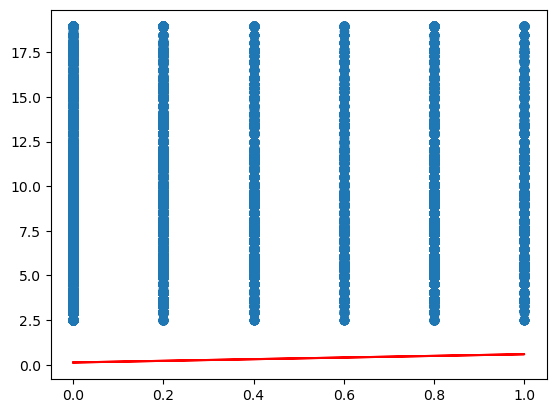

In [53]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [54]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:50:06   Log-Likelihood:            -2.7810e+05
No. Observations:              121722   AIC:                         5.562e+05
Df Residuals:                  121711   BIC:                         5.563e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1370      0.024    1

In [55]:
# Dropping insignificant variables, high p value

X = X_train.drop('Tuesday', axis=1)

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Friday,3.28
8,Thursday,3.24
10,Wednesday,3.18
6,Saturday,3.15
9,Tuesday,3.15
5,Monday,2.88
7,Sunday,2.72
3,Traffic_Weitage,2.38
2,Hour,2.36
0,passenger_count,1.00


In [58]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:50:07   Log-Likelihood:            -2.7810e+05
No. Observations:              121722   AIC:                         5.562e+05
Df Residuals:                  121711   BIC:                         5.563e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6131      0.032    1

# Residual Analysis of the train data

In [60]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

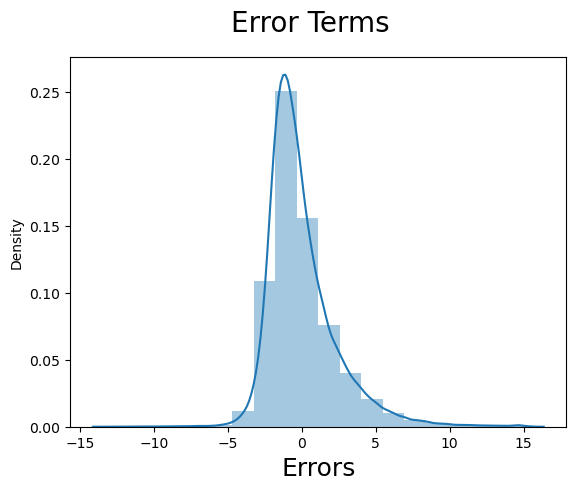

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Errors are normally distributed.

## Step : Making Predictions Using the Final Model

In [62]:
df_test.describe()

,passenger_count,distance_km,Hour,Traffic_Weitage,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000,52167.000000
mean,0.137524,0.343774,0.590789,0.693397,0.154025,0.125597,0.151628,0.128606,0.151648,0.141699,0.146798
std,0.260696,0.225127,0.280106,0.209074,0.360976,0.331397,0.358664,0.334767,0.358682,0.348744,0.353908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.175152,0.391304,0.657240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.291579,0.608696,0.698068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200000,0.470880,0.826087,0.807907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000019,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [64]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3

X_test_m3 = X_test_m3.drop('Tuesday', axis = 1)

In [65]:
# Making predictions using the fourth model

y_pred_m3 = lr_3.predict(X_test_m3)

# Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

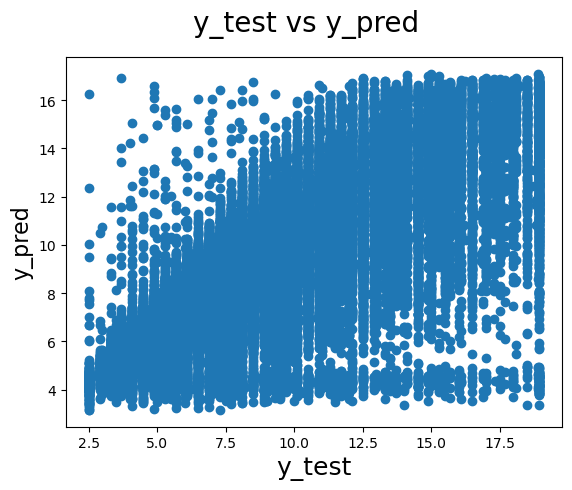

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#  Evaluate model performance

In [71]:

from sklearn.metrics import mean_squared_error



dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_m3))
print("Root Mean Squared Error (RMSE):", dt_rmse)

Root Mean Squared Error (RMSE): 2.359835968732813
